# Model Fitness
Model Fitness es una cadena de gimnasios. Uno de los problemas más comunes que enfrentan los gimnasios.

En el caso de un gimnasio, tiene sentido decir que un cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. 

Como data analyst, la tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Etapas del proyecto:
1. Importar los datos
2. Llevar a cabo el análisis exploratorio de datos (EDA)
3. Construir un modelo para predecir la cancelación de usuarios
4. Crear clústeres de usuarios
5. Conclusiones y recomendaciones

---

Model Fitness is a gym chain. One of the most common issues that gyms face.

In the case of a gym, it makes sense to say a client has left if they haven’t come for a month. Of course, they might be in Cancun and resume their visits when they return, but that’s not a typical case. Generally, if a client joins, comes several times, and then stops showing up, they are unlikely to return.

To combat cancellations, Model Fitness has digitized several of its client profiles.

As a data analyst, your task is to analyze them and develop a customer retention strategy.

Project Stages:
1. Import the data
2. Conduct exploratory data analysis (EDA)
3. Build a model to predict user churn
4. Create user clusters
5. Conclusions and recommendations

## Abrir el archivo de datos / Open data file

In [1]:
# Importar librerias / Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [2]:
# Abrir archivo / Open file
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
# Mustra de los datos / Data sample
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Análisis exploratorio de datos (EDA) / Exploratory data analysis (EDA)

In [4]:
# Información general / General information
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Algunos nombres de las columnas están en mayúscula y otros en minúscula, por lo que vamos a igualarlos todos, para una mejor visualización. Por otro lado, no se observan valores ausentes.

---

Some column names are in uppercase and others in lowercase, so we will standardize them for better visualization. On the other hand, no missing values are observed.

In [5]:
# Cambiar nombres columnas / Rename columns
new_col_names = []
for old_names in gym.columns:
    name_lowered = old_names.lower()
    new_col_names.append(name_lowered)
    
gym.columns = new_col_names

In [6]:
# Estadística descriptiva / Descriptive Statistics
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- `Edad`: **Promedio** de 29 años, con una **desviación estándar** de aproximadamente 3.26.
- `Periodo de Contrato (contract_period)`: El contrato **promedio** es de alrededor de 4.68 meses, con un rango que va de 1 a 12 meses.
- `Visitas Grupales`: Alrededor del 41% de los usuarios participan en sesiones grupales.
- `Gastos Adicionales`: El gasto **promedio** en servicios adicionales es de 146.94, con una **desviación estándar** de 96.35.
- `Cancelación`: El 26.5% de los usuarios en el dataset han cancelado su membresía.

Frecuencia Media de Clases:
- `Total`: **Promedio** de 1.88 clases por semana a lo largo de la membresía.
- `Mes Actual`: **Promedio** de 1.77 clases por semana en el mes en curso.

---

- `Age`: **Average** of 29 years, with a **standard deviation** of approximately 3.26.
- `Contract Period`: The **average** contract length is around 4.68 months, with a range from 1 to 12 months.
- `Group Visits`: About 41% of users participate in group sessions.
- `Avg Additional Charges`: The **average** additional spending on services is 146.94, with a **standard deviation** of 96.35.
- `Churn`: 26.5% of the users in the dataset have canceled their membership.

Average Class Frequency:
- `Total`: An **average** of 1.88 classes per week throughout the membership.
- `Current Month`: An **average** of 1.77 classes per week in the current month.

In [7]:
# Valores medios de las características: para las personas que se fueron y para las que se quedaron
# Mean values for characteristics: Users who left vs. Those who stayed
churn_mean = gym.groupby('churn').mean()
churn_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- `Ubicación Cercana`: Los usuarios que **se quedaron** (0) tienen una probabilidad mayor de vivir o trabajar cerca del gimnasio (87%) en comparación con los que **cancelaron** (77%).
- `Empresa asociada`: La membresia a través de empresas asociadas es más común entre los que **se quedaron(( (53%), que entre los que **cancelaron** (35%).
- `Promoción de amigos`: Las personas que ***se quedaron** usaron con mayor frecuencia la promoción de amigos (35%), que los que **cancelaron** (18%).
- `Periodo de Contrato`: Los contratos son significativamente más largos (5.7 meses) entre los usuarios que **se quedaron**, que entre los que **cancelaron** (1.7 meses). 
- `Visitas Grupales`: Los usuarios que participaron en sesiones grupales (46%) tienen una mayor **retención**,  en comparación con aquellos que **cancelaron** (27%)
- `Gastos Adicionales`: El gasto promedio en servicios adicionales entre los usuarios que **se quedaron** (158.45), es más alto que el de los usuarios que **se fueron** (115.08).

Frecuencia Media de Clases:
- `Total`: Los que **se quedaron** tienen una frecuencia promedio de 2 clases por semana, mientras que los que **cancelaron** tienen una frecuencia de 1.47.
- `Mes Actual`: En el grupo de usuarios que **se quedó**, la frecuencia en el mes actual es de 2.03 visitas por semana, mientras que en el grupo de **cancelación** es 1.04, mostrando que la disminución en la frecuencia reciente puede estar vinculada con la cancelación.

---

- `Near Location`: Users who **stayed** (0) are more likely to live or work near the gym (87%) compared to those who **canceled** (77%).
- `Partner Company`: Membership through partner companies is more common among those who **stayed** (53%) than among those who **canceled** (35%).
- `Friend Promotion`: People who **stayed** more frequently used the friend promotion (35%) than those who **canceled* (18%).
- `Contract Period`: Contracts are significantly longer (5.7 months) among users who **stayed** than among those who **canceled** (1.7 months).
- `Group Visits`: Users who participated in group sessions (46%) have higher **retention** compared to those who **canceled** (27%).
- `Additional Expenses`: The average additional spending for users who **stayed** (158.45) is higher than for users who **left** (115.08).

Average Class Frequency:
- `Total`: Those who **stayed** have an average frequency of 2 classes per week, while those who **canceled** attend 1.47 times.
- `Current Month`: Among users who **stayed**, the current month's frequency is 2.03 visits per week, while it’s 1.04 in the group that **canceled**, suggesting that recent frequency decreases may be linked to cancellations.

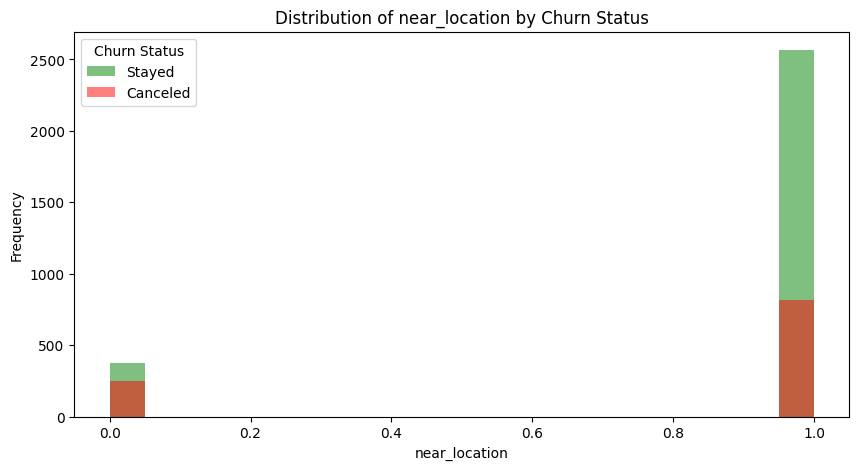

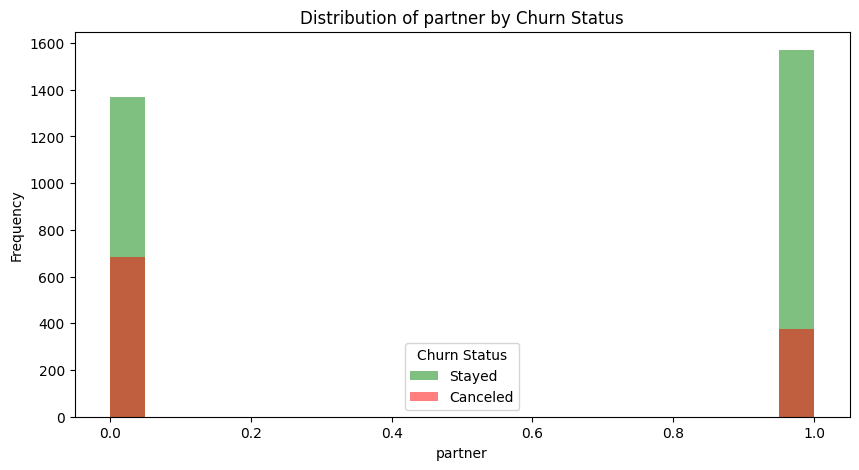

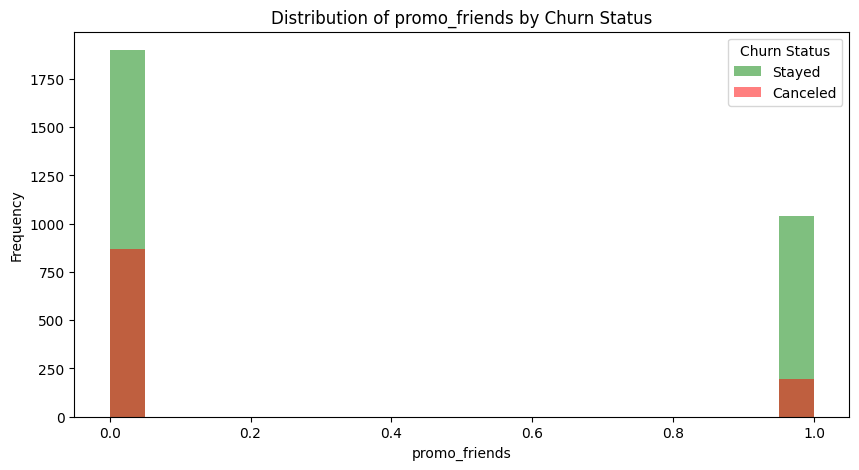

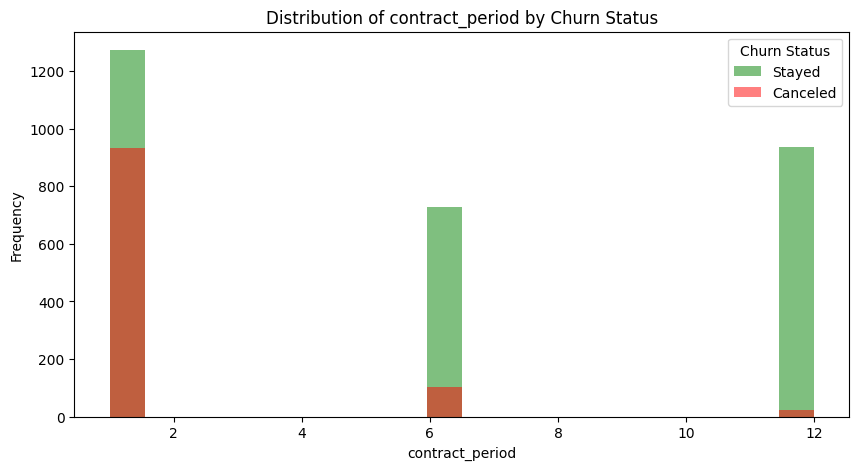

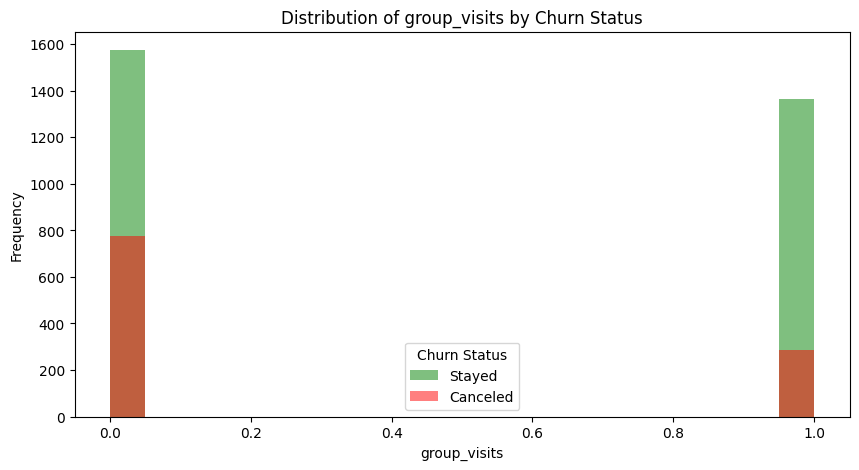

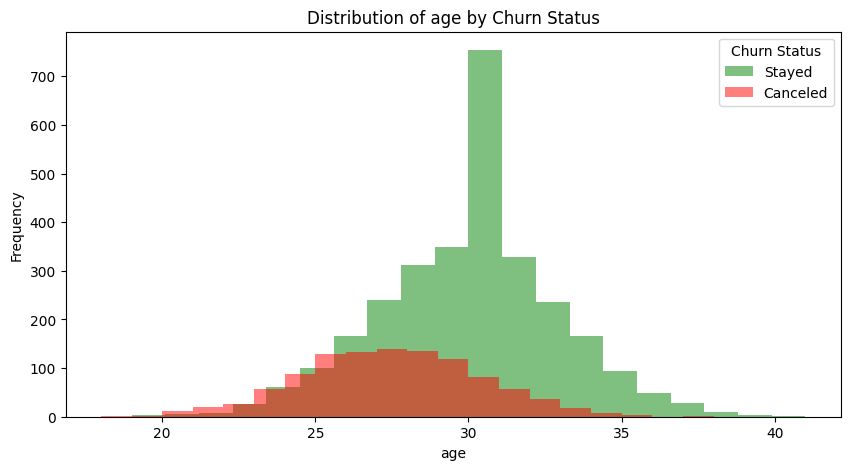

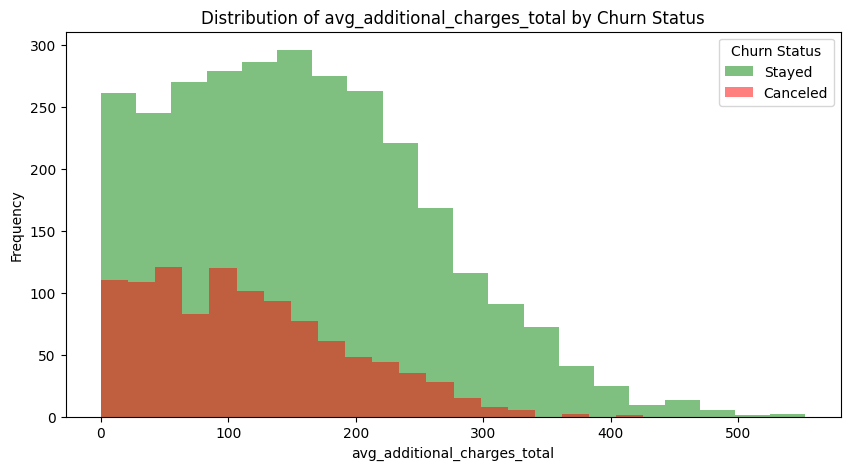

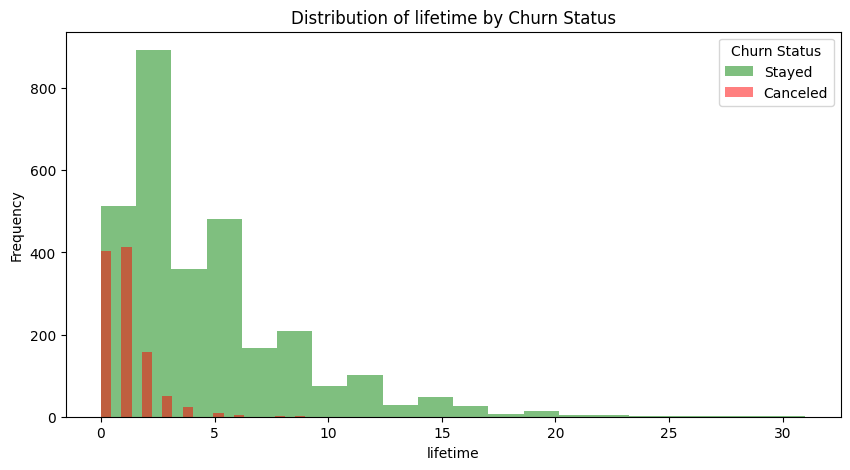

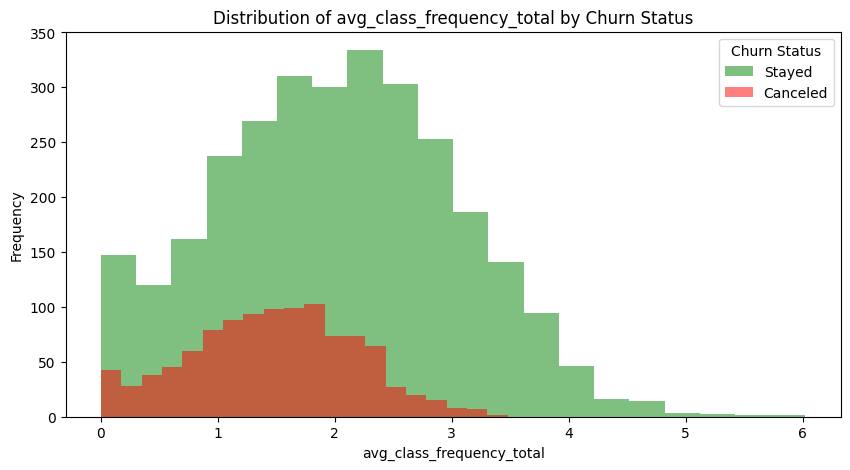

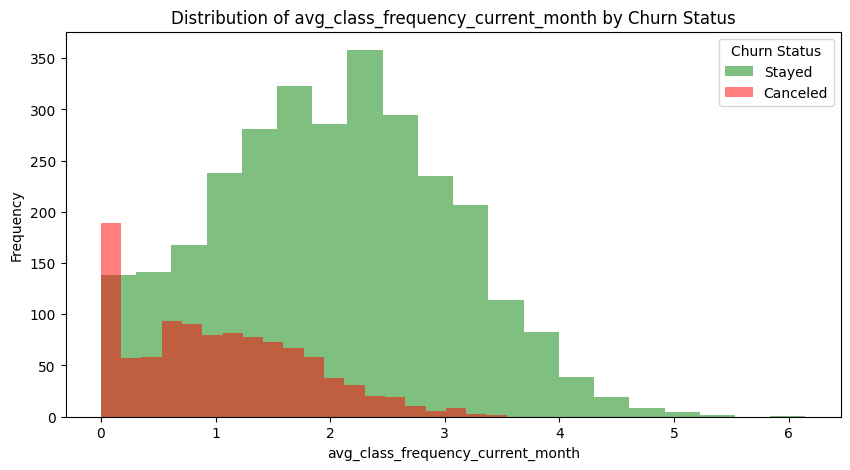

In [8]:
# Histogramas para los usuarios que cancelaron / Histograms for users who canceled

# Lista de características a graficar / List of Features to plot
features = ['near_location', 'partner', 'promo_friends', 'contract_period', 'group_visits', 'age', 
            'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 
            'avg_class_frequency_current_month']

# Crear gráficos para cada característica / Create plots for each feature
for feature in features:
    plt.figure(figsize=(10, 5))
    
    # Histograma para usuarios que se quedaron (Churn=0) / Histogram for users who stayed (Churn=0)
    plt.hist(gym[gym['churn'] == 0][feature], bins=20, alpha=0.5, label='Stayed', color='green')
    
    # Histograma para usuarios que cancelaron (Churn=1) / Histogram for users who canceled (Churn=1)
    plt.hist(gym[gym['churn'] == 1][feature], bins=20, alpha=0.5, label='Canceled', color='red')
    
    # Configuraciones adicionales del gráfico / Additional plot settings
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Churn Status')
    
    plt.show()

Con los histogramas se confirma lo que que las características de `ubicación cercana`, `empresa asociada`, `promoción de amigos`, `periodo de contrato` , `visitas grupales`, `gastos adicionales`, `promedio clases semanales` y `visitas en el últimos mes`, tiene una influencia en los usuarios que cancelan. 

--- 

The histograms confirm that features such as `near location`, `partner company`, `friend promotion`, `contract period`, `group visits`, `additional expenses`, `average weekly classes`, and `recent visits` influence user cancellations.

In [9]:
# Crea una matriz de correlación /Create a correlation matrix
cm = gym.corr()
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


Hay dos pares de características que tienen un coeficiente de correlación muy alto:
- `Meses para que se acabe el contrato` - `periodo de contrato`: 0.97
- `Promedio clases semanales` - `promedio clases mes actual`: 0.95

---

There are two pairs of characteristics with very high correlation coefficients:
- `Months left until contract end` - `contract period`: 0.97
- `Average weekly classes` - `average classes in the current month`: 0.95

## Construir un modelo para predecir la cancelación de usuarios / Build a model to predict user churn

In [10]:
# Dividir dataframe en variable objetivo y caracteristicas de entrenamiento
# # Split DataFrame into target variable and training features
x = gym.drop(['churn'], axis=1)
y = gym['churn']

# Dividir los datos en conjuntos de entrenamiento y validación 
# Split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
# Estandariza los datos / Standardize the data
scaler = StandardScaler()

# Entrenar el scaler en el conjunto de entrenamiento utilizando el método fit
# Train the scaler on the training set using the fit method
scaler.fit(x_train) 

# Estandarizar el conjunto de entrenamiento utilizando el método transform scaler
# Standardize the training set using the transform method of the scaler
x_train_st =  scaler.transform(x_train) 

# Estandarizar el conjunto de validación utilizando el método transform scaler
# Standardize the validation set using the transform method of the scaler
x_test_st = scaler.transform(x_test) 

### Evaluar la `exactitud`, `precisión` y `recall` para los modelos regresión logística y bosque aleatorio / Evaluate `accuracy`, `precision`, and `recall` for logistic regression and random forest models

In [12]:
# Definir una función para generar las métricas / Define a function to generate metric
def print_all_metrics(y_true, y_pred, y_proba, title = 'Metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

#### Regresión logística

In [13]:
# Definir el algoritmo del modelo / Define the model algorithm
lr_model = LogisticRegression(random_state=0)

# Entrenar el modelo / Train the model
lr_model.fit(x_train_st, y_train)

# Utilizar el modelo entrenado para hacer previsiones / Use the trained model to make predictions
lr_predictions = lr_model.predict(x_test_st)
lr_probabilities = lr_model.predict_proba(x_test_st)[:,1]

In [15]:
# Mostrar las métricas / Display metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Logistic regression metrics:')

Logistic regression metrics:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


#### Bosque aleatorios

In [17]:
# Definir el algoritmo del modelo / Define the model algorithm
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# Entrenar el modelo/ Train the model
rf_model.fit(x_train_st, y_train)

# Utilizar el modelo entrenado para hacer previsiones / Use the trained model to make predictions
rf_predictions = rf_model.predict(x_test_st)
rf_probabilities = rf_model.predict_proba(x_test_st)[:,1]

In [18]:
# Mostrar las métricas / Display metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities , title='Random forest metrics:')

Random forest metrics:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Las predicciones son correctas en más del `80%`.

Para los dos metodos se obtuvieron métricas de clasificación muy similares:
- Exactitud (0.92): El 92% de las predicciones realizadas por el modelo son correctas.
- Precisión (0.85): El 85% de las veces que el modelo predice que un cliente cancelará, realmente lo hace.
- Recall (0.83): El modelo identifica correctamente el 83% de los clientes que realmente cancelan su membresía.

---

Predictions are correct over `80%` of the time.

For both methods, similar classification metrics were achieved:
- Accuracy (0.92): 92% of the model’s predictions are correct.
- Precision (0.85): When the model predicts a client will cancel, it is correct 85% of the time.
- Recall (0.83): The model correctly identifies 83% of clients who actually cancel.

 ## Crear clústeres de usuarios / Create user clusters

In [19]:
# Estandarizar los datos / Standardize the data

# Crear un objeto de clase scaler (normalizador) / Create a scaler object (normalizer)
sc = StandardScaler()

# Entrenar el normalizador y transformar el conjunto de datos
# Train and transform the dataset with the normalizer
x_sc = sc.fit_transform(gym.drop(columns = ['churn']))

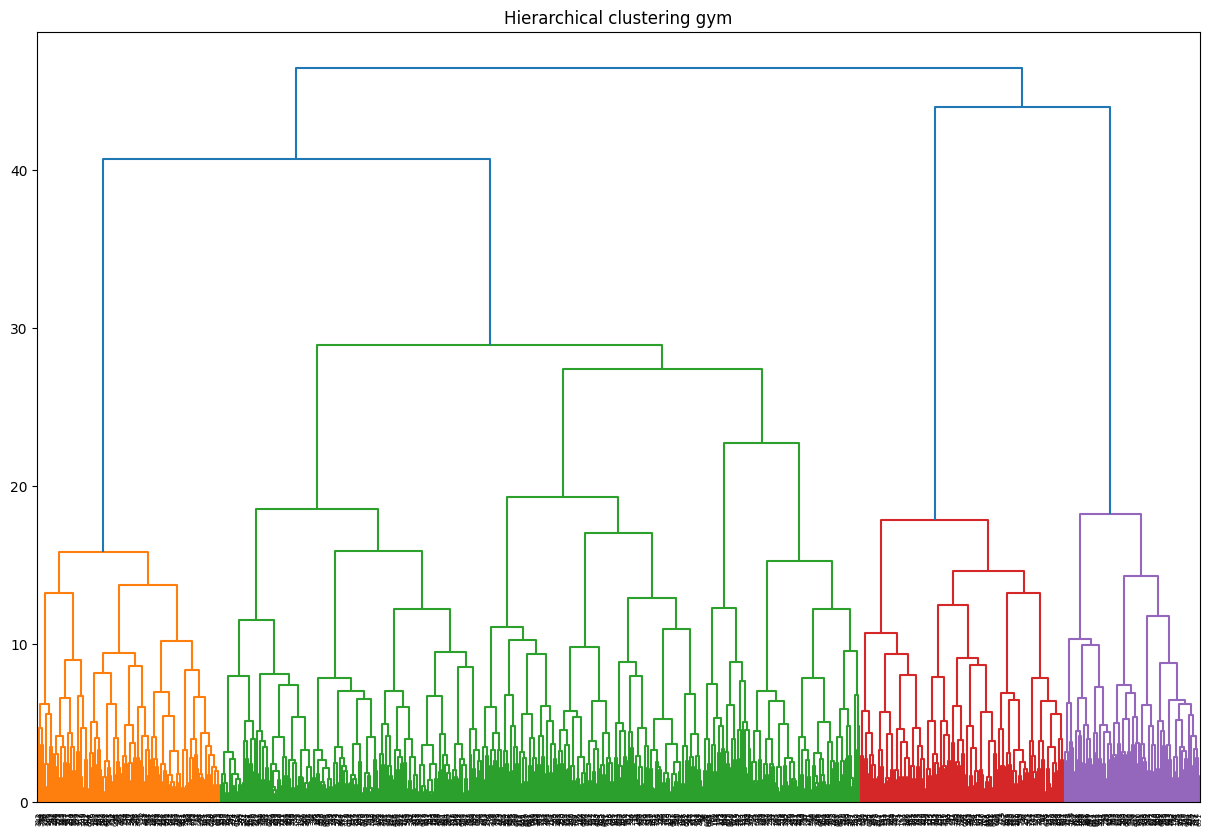

In [20]:
# Trazar un dendrograma / Plot a dendrogram
linked = linkage(x_test_st, method = 'ward')

plt.figure(figsize = (15,10))
dendrogram(linked, orientation = 'top')
plt.title('Hierarchical clustering gym')
plt.show()

Según el dendrograma el número sugerido de clusters es `4`, que corresponden a los colores. 

---

According to the dendrogram, the suggested number of clusters is `4`, which correspond to the colors.

In [21]:
# Clustering con KMeans / Clustering with KMeans

# Se toma n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado
# n=5 is chosen to make it easier to compare the results with those of the other students
km = KMeans(n_clusters = 5) 
labels = km.fit_predict(x_sc)

In [22]:
# Almacenar etiquetas de clúster en el campo del conjunto de datos / Store cluster labels in the dataset field
gym['cluster_km'] = labels

In [23]:
# Obtener las estadísticas de los valores medios de las características por clúster
# Get statistics on mean feature values by cluster
gym_gb = gym.groupby('cluster_km').mean()
gym_gb

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.501984,0.959325,0.780754,0.571429,1.0,10.922619,0.544643,29.983135,160.760513,9.979167,4.730159,1.986463,1.979084,0.027778
1,0.553118,0.979215,0.367206,0.247113,1.0,2.599307,0.468822,30.127021,161.886525,2.399538,4.961894,2.805300,2.802349,0.068129
2,0.495069,0.000000,0.461538,0.078895,1.0,2.357002,0.216963,28.487179,135.597531,2.203156,2.804734,1.667761,1.486188,0.441815
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
4,0.489051,1.000000,0.345499,0.231955,1.0,1.966748,0.339822,28.120032,130.675002,1.875912,2.344688,1.235242,0.995545,0.524736


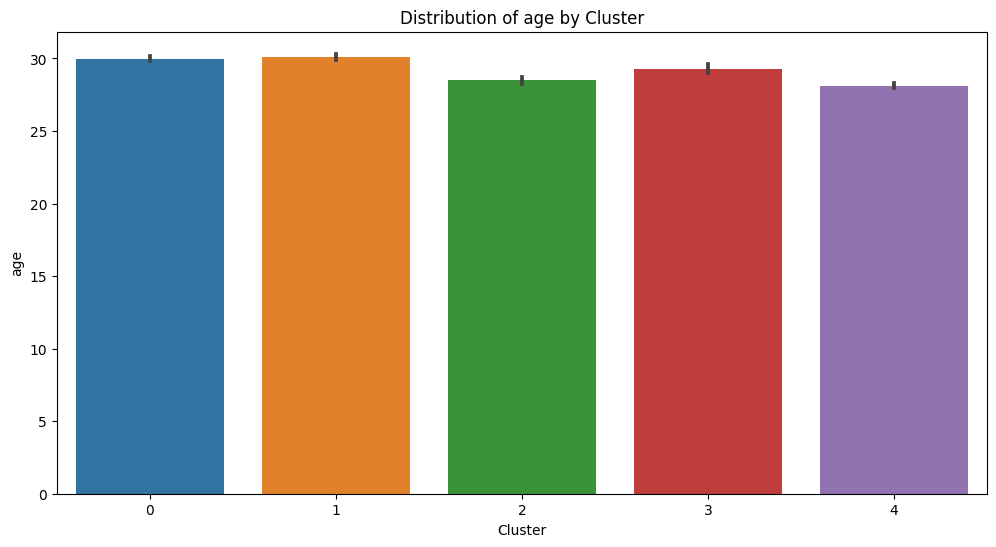

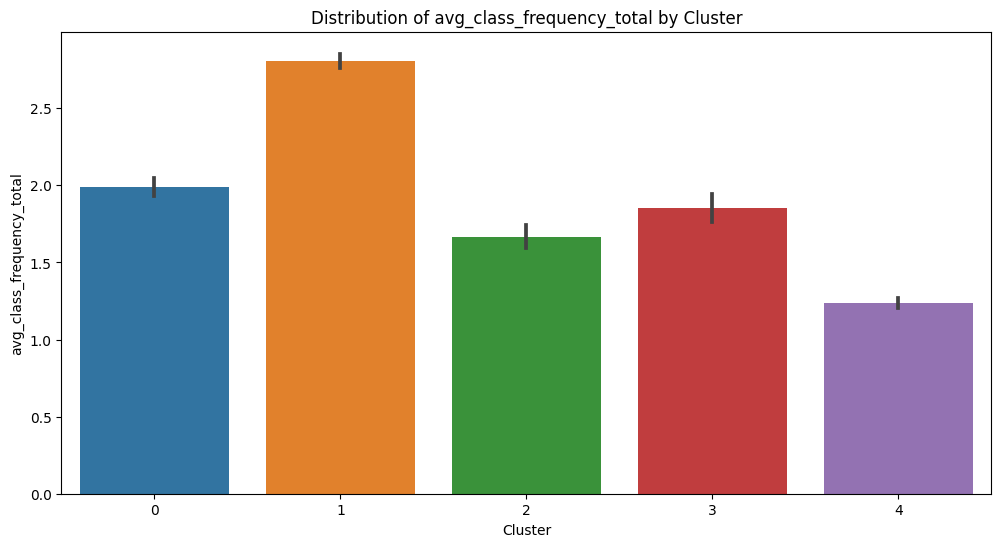

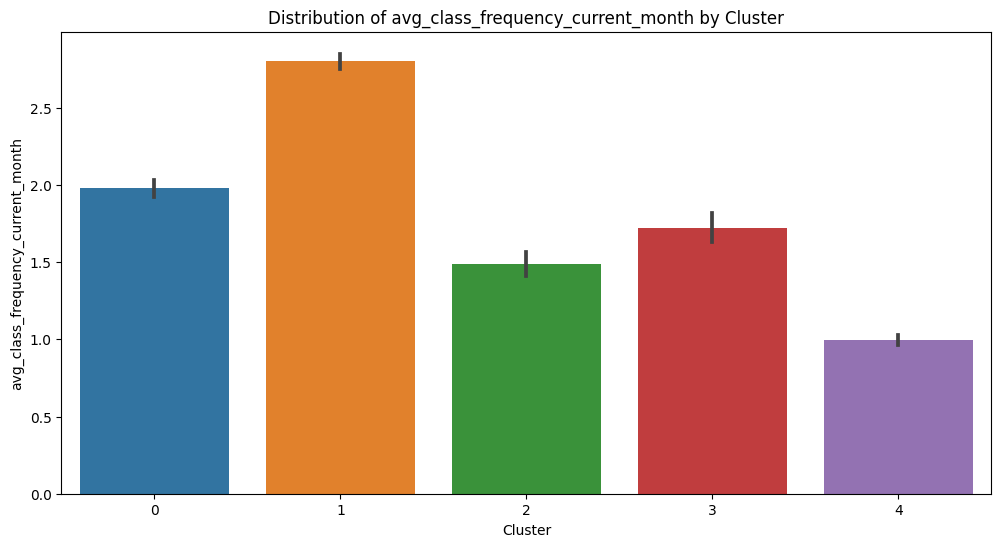

In [24]:
# Lista de características a graficar / List of Features to Plot
features = ['age', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

# Trazar distribuciones / Plot distributions
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='cluster_km', y=feature, data=gym, estimator=np.mean)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

In [25]:
# Calcular la tasa de cancelación para cada clúster / Calculate churn rate for each cluster
churn_rate_by_cluster = gym.groupby('cluster_km')['churn'].mean().reset_index()

# Renomabrar la columna para mayor claridad / Rename the column for clarity
churn_rate_by_cluster.rename(columns = {'churn':'cancellation_rate'}, inplace = True)
churn_rate_by_cluster

,cluster_km,cancellation_rate
0,0,0.027778
1,1,0.068129
2,2,0.441815
3,3,0.266839
4,4,0.524736


Los clústeres muestran diferencias significativas en las tasas de cancelación. Los más cercanos son el `0` y `4`.

**Grupos Propensos a Irse:**
- Cluster 1: es el más propenso a irse, con una tasa de cancelación del `52%`.
- Cluster 3: también muestra un alto riesgo, con un `44%` de tasa de cancelación.

**Grupos Leales:**
- Cluster 4: es el grupo más leal, con solo un `3%` de cancelaciones.
- Cluster 0: es el segundo grupo más leal, con un `7%` de cancelaciones.
- Clusters 2: aunque no tiene un alto riesgo, sí muestra cierta propensidad a irse con un `28%`.

---

The clusters show significant differences in churn rates. The closest clusters are `0` and `4`.

**Groups Likely to Leave:**
- Cluster 1: Most likely to leave, with a churn rate of `52%`.
- Cluster 3: Also shows high risk, with a churn rate of `44%`.

**Loyal Groups:**
- Cluster 4: Most loyal, with only `3%` churn.
- Cluster 0: Second most loyal, with a `7%` churn rate.
- Cluster 2: Though not high-risk, shows some propensity to leave at `28%`.

## Conslusiones y Recomendaciones / Conclusions and Recommendations

**Conclusiones:**
- `Ubicación Cercana`: La mayor retención entre usuarios que viven o trabajan cerca del gimnasio sugiere que la proximidad geográfica es un factor importante para mantener la lealtad.
- `Empresa Asociada`: Una mayor tasa de retención a través de empresas asociadas entre los usuarios leales indica que las alianzas corporativas podrían ser una estrategia efectiva de retención.
- `Promoción de Amigos`: El uso más frecuente de promociones de amigos entre los usuarios que se quedaron puede señalar que las recomendaciones personales son efectivas para la retención.
- `Visitas Grupales`: La participación en sesiones grupales está fuertemente correlacionada con la retención, lo que sugiere que fomentar la comunidad podría ayudar a mantener a los usuarios.
- `Frecuencia Media de Clases`: La mayor frecuencia de asistencia a clases en los usuarios leales indica que la actividad regular en el gimnasio está asociada con la retención. La disminución de la frecuencia puede ser un predictor de la cancelación.

- Las altas correlaciones entre el periodo de contrato y los meses restantes hasta el fin del contrato, así como entre la frecuencia media de clases y la frecuencia del mes actual, sugieren que estas características están íntimamente relacionadas y podrían ser redundantes en algunos análisis.

- Tanto el modelo de regresión logística como el de bosque aleatorio tienen altas tasas de exactitud (0.92), lo que indica que ambos modelos son efectivos para predecir la cancelación. Sin embargo, la precisión y el recall son ligeramente mejores en el modelo de regresión logística. Esto puede significar que el modelo de regresión logística es ligeramente mejor para identificar usuarios que realmente cancelan.


- El `Cluster 1 (52%)` es el más propenso a cancelar, mientras que los `Cluster 0 (7%)` y `Cluster 4 (3%)` muestran la mejor retención. Esto sugiere que el `grupo 1` necesita atención urgente.

**Recomendaciones:**
1. `Para los Cluster 1 (52%)` y `Cluster 3 (44%)`:
- Implementar encuestas de satisfacción para comprender las razones de la cancelación.
- Ofrecer incentivos para la retención, como promociones especiales, mejoras en las membresías, o programas de lealtad.
- Aumentar la interacción y el compromiso a través de eventos comunitarios o clases grupales, dado que la participación en grupos se asocia con una mayor retención.

2. Promover la `cercanía` al gimnasio mediante campañas de marketing dirigidas a residentes, destacando la conveniencia de asistir.

3. Expandir las `asociaciones con empresas` para aumentar el número de membresías corporativas, aprovechando la tendencia observada en los usuarios leales.

4. Incentivar el uso de `promociones de amigos` a través de recompensas tanto para el usuario que trae a un amigo como para el nuevo miembro.

5. Implementar alertas o comunicaciones automáticas para usuarios cuya frecuencia de visitas haya disminuido, ofreciendo clases adicionales o descuentos para incentivar su regreso.

---

**Conclusions:**
- `Near Location`: Higher retention among users who live or work near the gym suggests geographic proximity is an important loyalty factor.
- `Partner Company`: Higher retention rates through partner companies among loyal users indicate corporate partnerships might be an effective retention strategy.
- `Friend Promotion`: More frequent use of friend promotions among users who stayed may indicate that personal referrals effectively boost retention.
- `Group Visits`: Participation in group sessions is strongly correlated with retention, suggesting fostering community could help retain users.
- `Average Class Frequency`: Higher class attendance frequency among loyal users indicates regular gym activity is associated with retention. A decrease in frequency may be a predictor of churn.

- The high correlations between contract period and remaining months, as well as between average class frequency and current month frequency, suggest that these features are closely related and may be redundant in some analyses.

- Both logistic regression and random forest models have high accuracy rates (0.92), indicating that both are effective for predicting churn. However, precision and recall are slightly higher for logistic regression, meaning that logistic regression may be slightly better at identifying users who actually churn.

- `Cluster 1 (52%)` is the most likely to churn, while `Clusters 0 (7%)` and `Cluster 4 (3%)` show the best retention. This suggests that `Group 1` requires urgent attention.

**Recommendations:**
1. For `Clusters 1 (52%)` and `Cluster 3 (44%)`:
- Implement satisfaction surveys to understand reasons for cancellation.
- Offer retention incentives, such as special promotions, membership upgrades, or loyalty programs.
- Increase interaction and engagement through community events or group classes, as group participation is associated with higher retention.

2. Promote gym `proximity` through marketing campaigns aimed at local residents, emphasizing the convenience of attendance.

3. Expand `partnerships with companies` to increase the number of corporate memberships, leveraging the observed loyalty trend among users with corporate affiliations.

4. Encourage the use of `friend promotions` through rewards for both the referring user and the new member.

5. Implement alerts or automatic messages for users whose visit frequency has decreased, offering additional classes or discounts to encourage their return.